In [2]:
import pandas as pd
from glob import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [33]:
# Obtener la lista de todos los archivos CSV en el directorio actual
archivos_csv = glob("*vecinos.csv")

# Iterar sobre cada archivo CSV
for archivo in archivos_csv:
    # Leer el archivo CSV
    df = pd.read_csv(archivo)
    
    # Crear una lista para almacenar las nuevas filas
    nuevas_filas = []
    
    # Lista para almacenar genes con más de un vecino
    genes_con_mas_de_un_vecino = []
    
    # Iterar sobre cada fila del DataFrame
    for index, row in df.iterrows():
        gen_id = row["Gen_ID"]
        vecinos = row["Vecinos"]
        
        # Verificar si hay más de dos valores separados por coma en la columna de Vecinos
        if "," in str(vecinos) and len(vecinos.split(",")) > 1:
            # Dividir los valores separados por coma y crear una nueva fila para cada uno
            for vecino in vecinos.split(","):
                nuevas_filas.append([gen_id, vecino.strip()])
            # Agregar el gen a la lista de genes con más de un vecino
            genes_con_mas_de_un_vecino.append(gen_id)
        else:
            # Si no hay más de dos valores, simplemente agregar la fila existente
            nuevas_filas.append([gen_id, vecinos])
    
    # Crear un nuevo DataFrame con las nuevas filas
    nuevo_df = pd.DataFrame(nuevas_filas, columns=["Gen_ID", "Vecinos"])
    
    # Guardar el nuevo DataFrame en un nuevo archivo CSV
    nuevo_archivo = f"{archivo.split('.')[0]}_actualizado.csv"
    nuevo_df.to_csv(nuevo_archivo, index=False)

    # Imprimir los genes con más de un vecino
    if genes_con_mas_de_un_vecino:
        print(f"En el archivo {archivo}, los siguientes genes tienen más de un vecino:")
        for gen in genes_con_mas_de_un_vecino:
            print(gen)

    print(f"Archivo actualizado guardado como: {nuevo_archivo}")


Archivo actualizado guardado como: Aspnid1_filtered_vecinos_actualizado.csv
En el archivo Cunech1_vecinos.csv, los siguientes genes tienen más de un vecino:
183389
Archivo actualizado guardado como: Cunech1_vecinos_actualizado.csv
En el archivo Hesve2finisherSC_vecinos.csv, los siguientes genes tienen más de un vecino:
1405097
1331872
1336460
1225215
1407221
1321639
1080470
83607
Archivo actualizado guardado como: Hesve2finisherSC_vecinos_actualizado.csv
En el archivo Liccor1_vecinos.csv, los siguientes genes tienen más de un vecino:
3901
9409
9410
8935
7360
7795
7006
6128
12527
12607
4829
8515
4933
7439
8630
3777
2811
10797
12142
2424
6992
6730
2374
4087
7367
5492
505
9527
300
8657
7038
6255
5357
2733
8456
6344
13300
6445
7917
2884
2885
5215
6131
4558
1747
3515
2881
2882
2883
4660
11925
11226
9872
4921
7303
3071
11874
3417
8142
7390
8712
9725
1011
5592
8780
11859
2618
6967
4807
9021
9186
9411
9412
96
8888
2718
9366
13060
43
4348
7429
1558
4417
12424
3524
6357
6125
5949
3735
3972
5138


In [49]:
# Leer el archivo CSV de phycomyces
df = pd.read_csv("Phybl2_vecinos_actualizado.csv")

# Eliminar las filas duplicadas
df = df.drop_duplicates()

# Convertir los identificadores a enteros
df["Gen_ID"] = df["Gen_ID"].astype(int)
df["Vecinos"] = df["Vecinos"].astype(int)

# Guardar el DataFrame modificado en un nuevo archivo CSV
df.to_csv("Phybl2_vecinos_actualizado.csv", index=False)

In [ ]:
# DEFINITIVO
def promotores_dif(df):
    promotores = []
    for i, fila in df.iterrows():
        # Obtener información del gen actual (gene1)
        id_gen = fila['proteinId']
        start_gen = fila['start']
        end_gen = fila['end']
        scaffold_gen = fila['scaffold']
        strand = fila['strand']
        ID_promoter = "seq_" + str(id_gen)  # Convertir id_gen a cadena de caracteres
        id_vecino = fila['Vecinos']
        
        # Iterar sobre cada fila para encontrar el gen vecino
        for j, fila_vecino in df.iterrows():
            
            # Verificar si el gen vecino coincide con el ID de vecinos del gen actual
            id_gen2 = fila_vecino["Gen_ID"]
            if id_vecino == id_gen2:
               # print("Gen vecino encontrado:", id_gen2)
                start_vecino = fila_vecino['start']
                end_vecino = fila_vecino['end']
                
                if strand == "+":
                    startP = end_vecino
                    endP = start_gen
                    if startP < endP:  # Asegurarse de que el startP sea menor que el endP
                        promotores.append((scaffold_gen, startP, endP, strand, ID_promoter))
                elif strand == "-":
                    startP = end_gen
                    endP = start_vecino
                    if startP < endP:  # Asegurarse de que el startP sea menor que el endP
                        promotores.append((scaffold_gen, startP, endP, strand, ID_promoter))
    
    return promotores

In [ ]:
# Obtener la lista de todos los archivos CSV en el directorio actual
archivos_gff = glob("*_gff.csv")
archivos_vecinos = glob("*_vecinos_actualizado.csv")

# Iterar sobre cada archivo ortho
for archivo_gff in archivos_gff:
    # Obtener el primer campo del nombre del archivo ortho
    nombre_campo_gff = os.path.basename(archivo_gff).split('_')[0]
    
    # Buscar el archivo de vecinos que tenga el mismo primer campo en el nombre
    archivo_vecinos = next((f for f in archivos_vecinos if os.path.basename(f).startswith(nombre_campo_gff)), None)
    
    # Verificar si se encontró el archivo de vecinos correspondiente
    if archivo_vecinos:
        # Leer los archivos CSV
        gff = pd.read_csv(archivo_gff, sep=",")
        vecinos = pd.read_csv(archivo_vecinos, sep=",")

        # Realizar el merge
        merge_resultado = pd.merge(vecinos, gff, left_on= "Gen_ID", right_on="proteinId")
        merge_resultado["Vecinos"] = merge_resultado["Vecinos"].astype(int)
        merge_resultado["Gen_ID"] = merge_resultado["Gen_ID"].astype(int)
        #llamar a la función para los datos de los genes de levadura
        promotores = promotores_dif(merge_resultado)
        #convertir la lista de los promotores a una dataframe
        df_promotores = pd.DataFrame(promotores, columns=['scaffold','start', 'end', 'strand','ID'])
        
        #Filtrar para eliminar los valores duplicados
        df_promotores = df_promotores.drop_duplicates(subset=["start", "end"], keep='first')

        # Guardar el resultado en un nuevo archivo CSV
        nombre_salida = f"{nombre_campo_gff}_promoters.csv"  # Generar un nombre de archivo de salida
        df_promotores.to_csv(nombre_salida, index=False)
    else:
        print(f"No se encontró un archivo de vecinos correspondiente para {archivo_gff}. Saltando este archivo.")


In [ ]:
#con las categrias 
def clasificar_promotor(longitud):
    # Convertir la longitud a entero si no lo es
    if not isinstance(longitud, int):
        longitud = int(longitud)
        
    if longitud < 8:
        return 'Core'
    elif 8 <= longitud <= 100:
        return 'Medium'
    elif 100 < longitud <= 500:
        return 'Long'
    else:
        return 'Undefined'

def promotores_dif(df, processed_genes):
    promotores = []
    for i, fila in df.iterrows():
        # Obtener información del gen actual (gene1)
        id_gen = fila['proteinId']
        id_vecino = fila['Vecinos']
        
        # Verificar si el gen o su vecino ya han sido procesados
        if id_gen in processed_genes or id_vecino in processed_genes:
            continue
        
        start_gen = fila['start']
        end_gen = fila['end']
        scaffold_gen = fila['scaffold']
        strand = fila['strand']
        ID_promoter = "seq_" + str(id_gen)  # Convertir id_gen a cadena de caracteres
        
        # Encontrar el gen vecino
        fila_vecino = df[df["Gen_ID"] == id_vecino]
        if not fila_vecino.empty:
            start_vecino = fila_vecino['start'].values[0]
            end_vecino = fila_vecino['end'].values[0]
            
            if strand == "+":
                startP = end_vecino + 1
                endP = start_gen - 1
                longitudP = endP - startP
                categoria = clasificar_promotor(longitudP)
               # if startP < endP :  # Asegurarse de que el startP sea menor que el endP
                promotores.append((scaffold_gen, startP, endP, strand, ID_promoter, longitudP, categoria))
            elif strand == "-":
                startP = end_gen + 1
                endP = start_vecino - 1
                longitudP = endP - startP
                categoria = clasificar_promotor(longitudP)
               # if startP < endP :  # Asegurarse de que el startP sea menor que el endP
                promotores.append((scaffold_gen, startP, endP, strand, ID_promoter, longitudP, categoria))
            
            # Marcar el gen y su vecino como procesados
            processed_genes.add(id_gen)
            processed_genes.add(id_vecino)
    
    return promotores



# Obtener la lista de todos los archivos CSV en el directorio actual
archivos_gff = glob("*_gff.csv")
archivos_vecinos = glob("*_vecinos_actualizado.csv")

# Mantener un registro de los genes ya procesados
processed_genes = set()

# Iterar sobre cada archivo ortho
for archivo_gff in archivos_gff:
    # Obtener el primer campo del nombre del archivo ortho
    nombre_campo_gff = os.path.basename(archivo_gff).split('_')[0]
    
    # Buscar el archivo de vecinos que tenga el mismo primer campo en el nombre
    archivo_vecinos = next((f for f in archivos_vecinos if os.path.basename(f).startswith(nombre_campo_gff)), None)
    
    # Verificar si se encontró el archivo de vecinos correspondiente
    if archivo_vecinos:
        # Leer los archivos CSV
        gff = pd.read_csv(archivo_gff, sep=",")
        vecinos = pd.read_csv(archivo_vecinos, sep=",")
        
        # Realizar el merge
        merge_resultado = pd.merge(vecinos, gff, left_on="Gen_ID", right_on="proteinId")
        merge_resultado["Vecinos"] = merge_resultado["Vecinos"].astype(int)
        merge_resultado["Gen_ID"] = merge_resultado["Gen_ID"]
        
        # Llamar a la función para los datos de los genes de levadura
        promotores = promotores_dif(merge_resultado, processed_genes)
        
        # Convertir la lista de los promotores a un DataFrame
        df_promotores = pd.DataFrame(promotores, columns=['scaffold','start', 'end', 'strand','ID', 'longitud', 'categoria'])
        
        # Guardar el resultado en un nuevo archivo CSV
        nombre_salida_datos = f"{nombre_campo_gff}_promoters_with_categories.csv"  # Generar un nombre de archivo de salida
        df_promotores.to_csv(nombre_salida_datos, index=False)
        
        # Filtrar el DataFrame para seleccionar solo las categorías 'Medium' y 'Long'
        df_medium_long = df_promotores[df_promotores['categoria'].isin(['Medium', 'Long'])]

        # Seleccionar solo las columnas necesarias del DataFrame filtrado
        df_medium_long_subset = df_medium_long[['scaffold', 'start', 'end', 'strand']]

        # Guardar el DataFrame reducido en un nuevo archivo CSV
        nombre_salida_medium_long = f"{nombre_campo_gff}_promoters_medium_long.csv"
        df_medium_long_subset.to_csv(nombre_salida_medium_long, index=False, header=False)


        # Guardar el DataFrame original en otro archivo CSV
        nombre_salida_todos = f"{nombre_campo_gff}_promoters_all.csv"
        df_promotores.to_csv(nombre_salida_todos, index=False)

    else:
        print(f"No se encontró un archivo de vecinos correspondiente para {archivo_gff}. Saltando este archivo.")


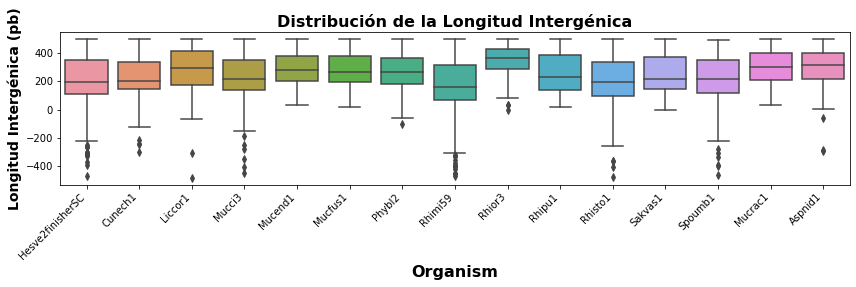

In [6]:
# Obtener la lista de archivos que terminan en promoters.csv
archivos_promotores = glob("*promoters.csv")

# Crear una lista para almacenar los DataFrames de longitud de cada organismo
dfs_longitud = []

for archivo in archivos_promotores:
    # Cargar los datos del archivo
    df_promotores = pd.read_csv(archivo)
    
    # Extraer el primer campo del nombre del archivo para el nombre del organismo
    nombre_organismo = os.path.basename(archivo).split('_')[0]
    
    # Agregar una columna al DataFrame para identificar el organismo
    df_promotores['Organismo'] = nombre_organismo
    
    # Agregar el DataFrame a la lista de DataFrames
    dfs_longitud.append(df_promotores)

# Concatenar todos los DataFrames en uno solo
df_total = pd.concat(dfs_longitud)
df_total_longitud_otherfungi = df_total[["Organismo","longitud"]]
df_total_longitud_otherfungi.to_csv("df_longitudes_IR_fungi.csv")

# Crear el violin plot
plt.figure(figsize=(12, 4))
sns.boxplot(x='Organismo', y='longitud', data=df_total)
plt.xlabel('Organism', fontsize=16, fontweight='bold')
plt.ylabel('Longitud Intergénica (pb)', fontsize=14, fontweight='bold')
plt.title('Distribución de la Longitud Intergénica', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


# Guardar el gráfico como archivo SVG
nombre_salida = "distribucion_longitud_promotores_por_organismo.svg"
plt.savefig(nombre_salida, format='svg')

# Mostrar el gráfico
plt.show()

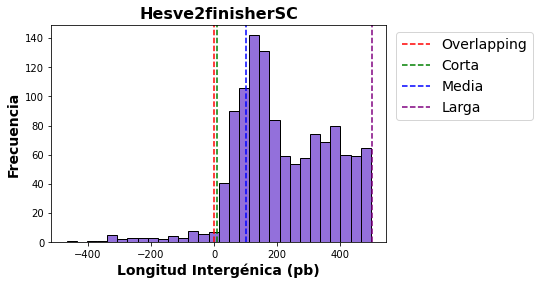

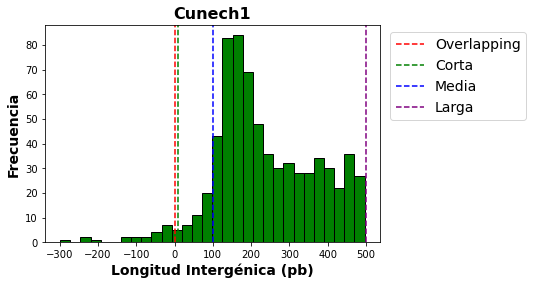

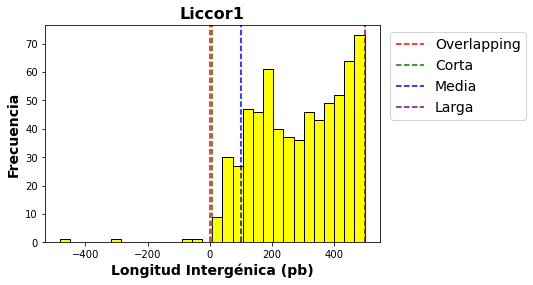

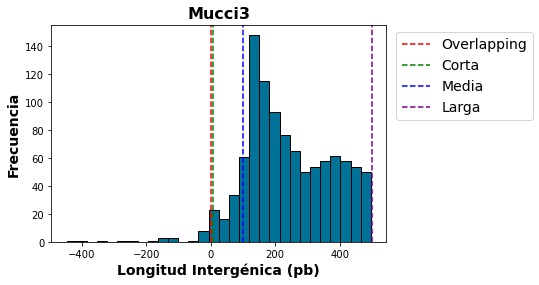

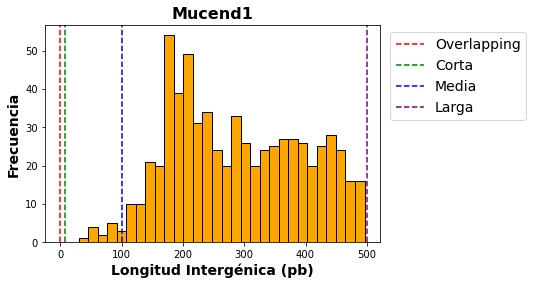

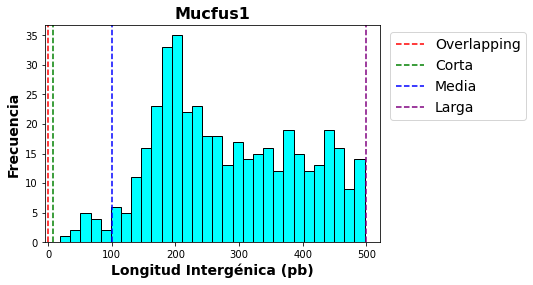

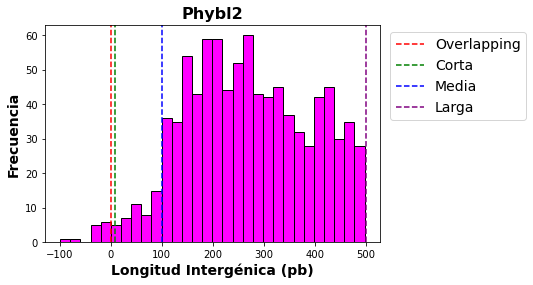

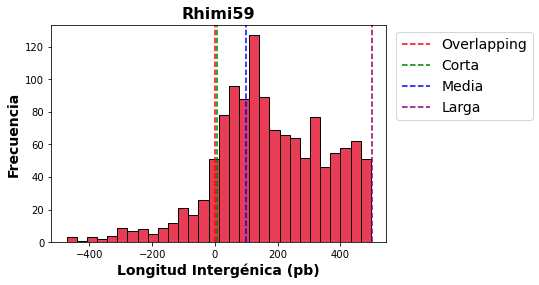

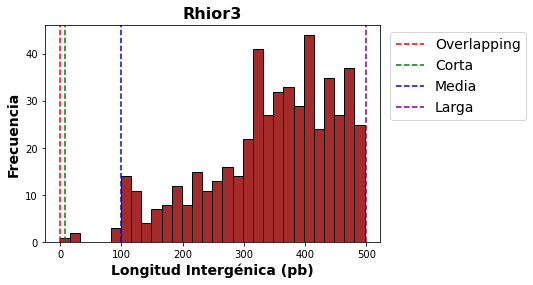

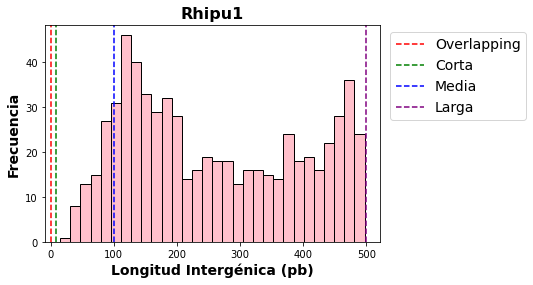

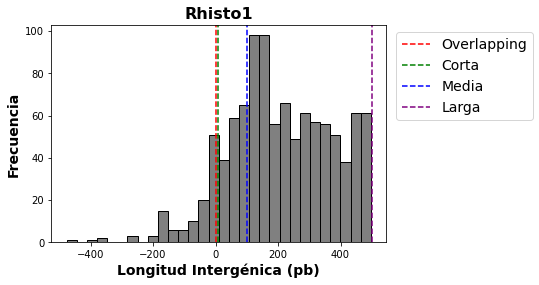

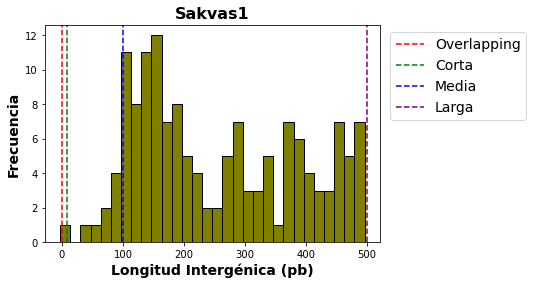

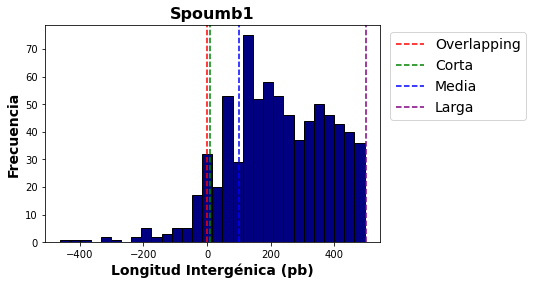

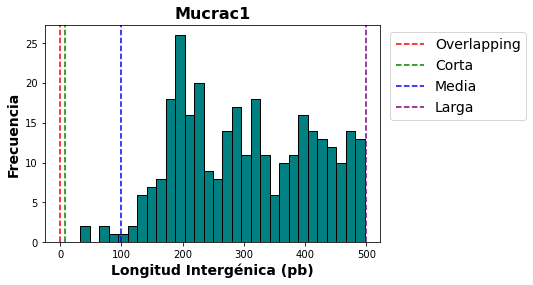

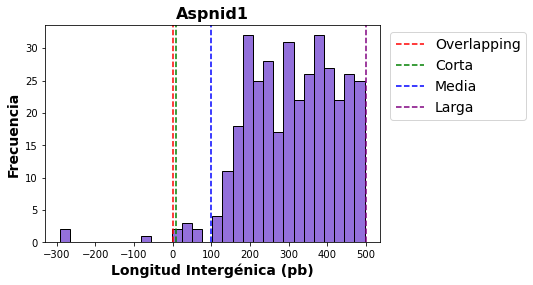

In [ ]:
# Definir 14 colores diferentes
colores = ['#9370DB', 'green', 'yellow', '#007298', 'orange', 'cyan', 'magenta', 
           '#E83D54', 'brown', 'pink', 'gray', 'olive', 'navy', 'teal']

# Obtener la lista de archivos que terminan en promoters.csv
archivos_promotores = glob("*promoters.csv")

# Crear un DataFrame vacío para almacenar todas las longitudes de promotores
total_df = pd.DataFrame()

# Función para clasificar promotores según su longitud
def clasificar_promotor(longitud):
    if longitud > 0 :
        return "Overlapping"
    if longitud == 0 or longitud < 8:
        return 'Core'
    elif 8 <= longitud < 100:
        return 'Medium'
    elif 100 <= longitud <= 500:
        return 'Long'
    else:
        return 'Undefined'  # Por si hay alguna longitud fuera del rango esperado

for i, archivo in enumerate(archivos_promotores):
    # Cargar los datos del archivo
    df_promotores = pd.read_csv(archivo)
    
    # Clasificar los promotores según su longitud
    df_promotores['Category'] = df_promotores['longitud'].apply(clasificar_promotor)
    
    # Extraer el primer campo del nombre del archivo para el título y el nombre del archivo de salida
    nombre_organismo = os.path.basename(archivo).split('_')[0]
    
    # Añadir una columna con el nombre del organismo
    df_promotores['Organism'] = nombre_organismo
    
    # Concatenar los datos al DataFrame total
    total_df = pd.concat([total_df, df_promotores], ignore_index=True)
    
    # Graficar el histograma de la longitud de los promotores
    plt.hist(df_promotores['longitud'], bins=30, edgecolor='black', color=colores[i % len(colores)])
    plt.xlabel('Longitud Intergénica (pb)', fontsize=14, fontweight='bold')
    plt.ylabel('Frecuencia', fontsize=14, fontweight='bold')
    plt.title(f'{nombre_organismo}', fontsize=16, fontweight='bold')
    
  # Añadir líneas verticales para las categorías
    plt.axvline(x=0, color='r', linestyle='--', label='Overlapping')
    plt.axvline(x=8, color='g', linestyle='--', label='Corta')
    plt.axvline(x=100, color='b', linestyle='--', label='Media')
    plt.axvline(x=500, color='purple', linestyle='--', label='Larga')
    
    
    # Añadir leyenda
    # Añadir leyenda y ajustar el tamaño de la fuente
    plt.legend(fontsize=14, loc='best', bbox_to_anchor=(1.01, 1))

    # Guardar el gráfico como archivo SVG
    nombre_salida = f"{nombre_organismo}_promoter_length_distribution.svg"
    plt.savefig(nombre_salida, format='svg', bbox_inches='tight')
    
    # Mostrar el gráfico (opcional, puedes comentar esta línea si no necesitas mostrar los gráficos)
    plt.show()
    
    # Cerrar la figura para evitar superposiciones en la próxima iteración
    plt.close()


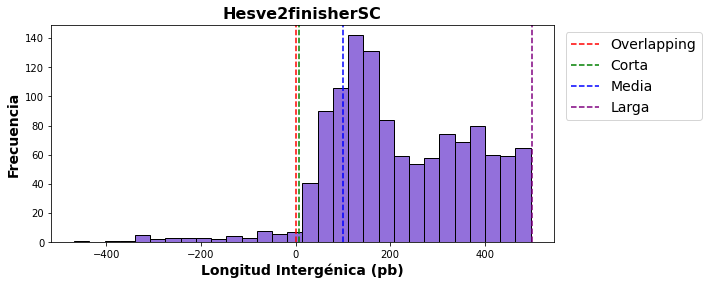

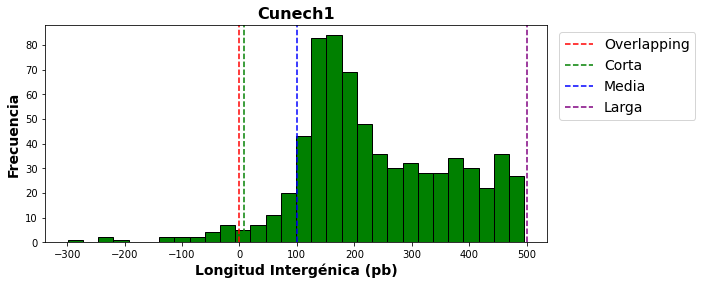

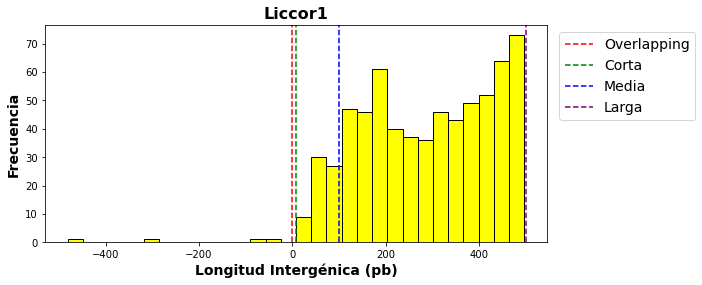

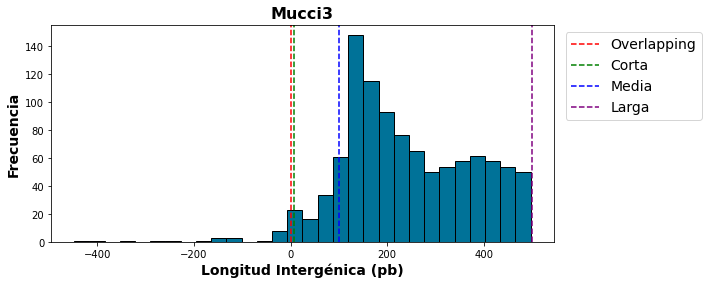

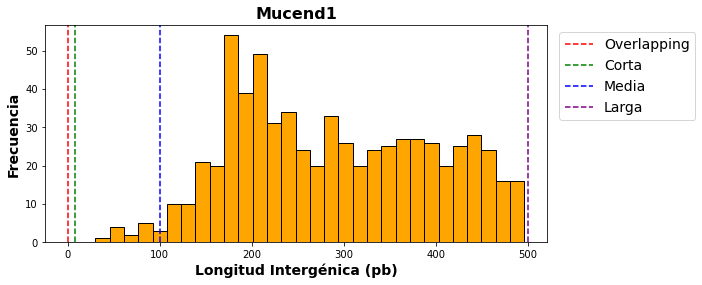

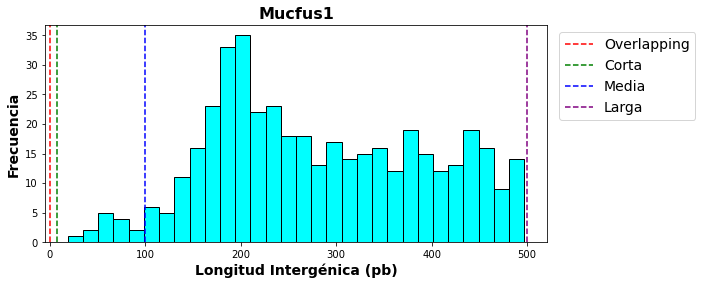

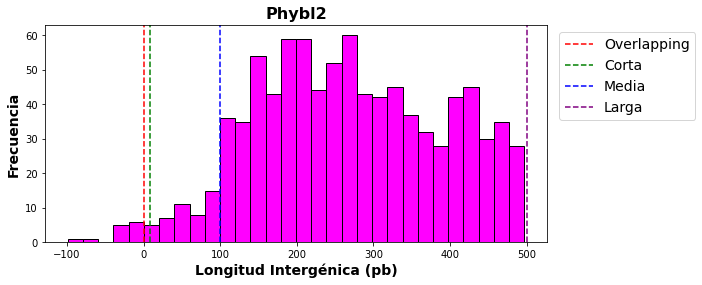

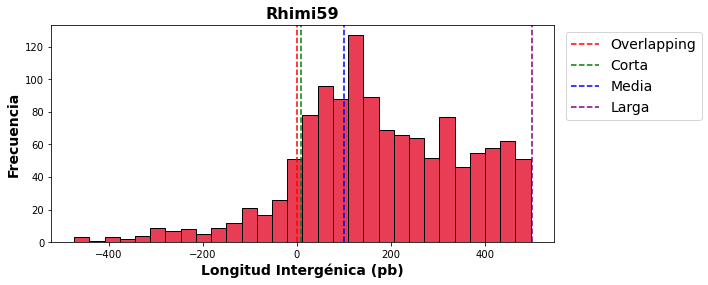

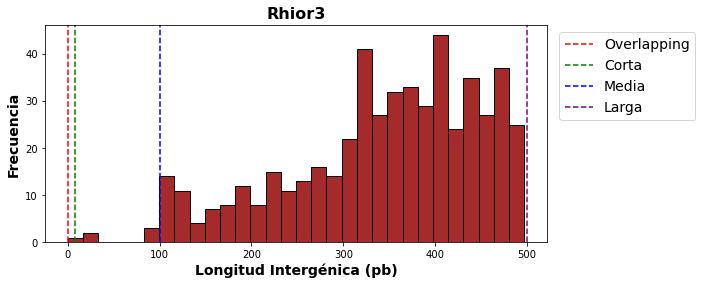

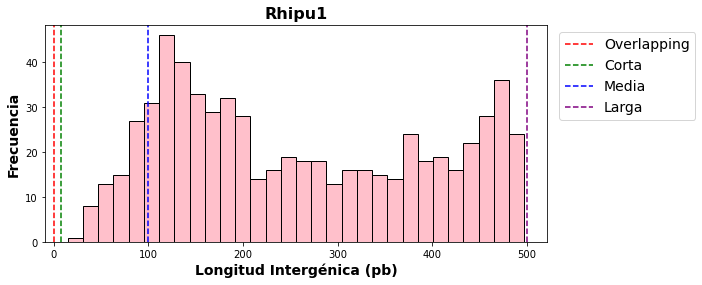

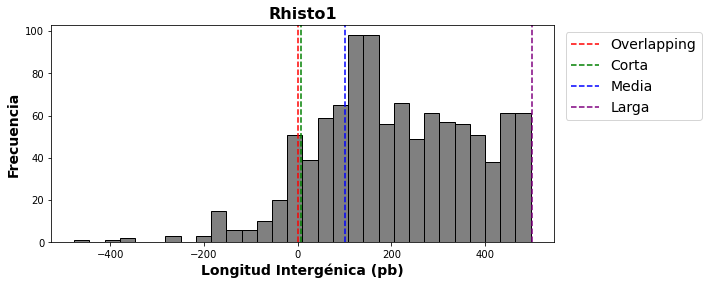

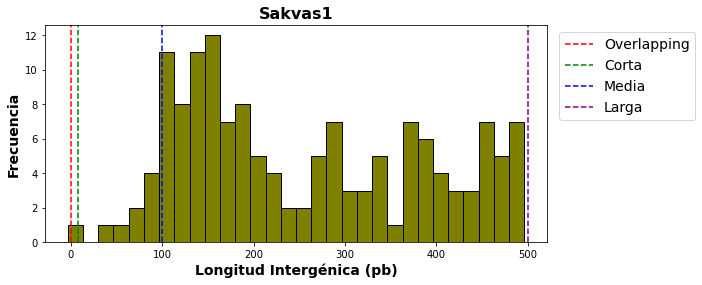

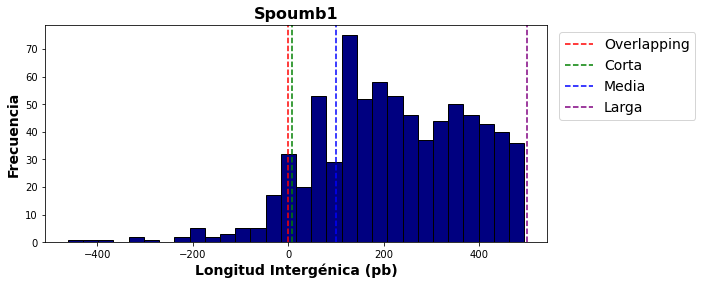

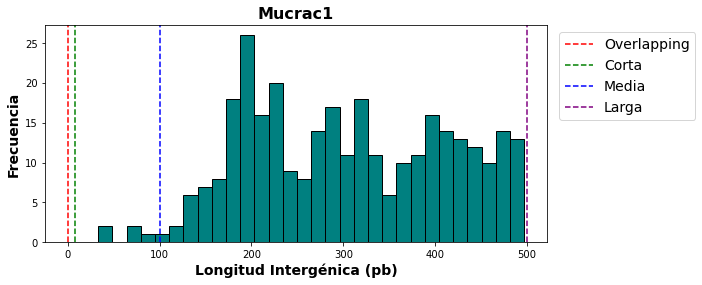

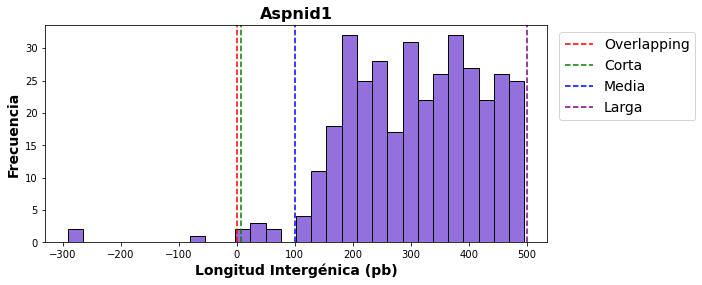

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
import os

# Definir 14 colores diferentes
colores = ['#9370DB', 'green', 'yellow', '#007298', 'orange', 'cyan', 'magenta', 
           '#E83D54', 'brown', 'pink', 'gray', 'olive', 'navy', 'teal']

# Obtener la lista de archivos que terminan en promoters.csv
archivos_promotores = glob("*promoters.csv")

# Crear un DataFrame vacío para almacenar todas las longitudes de promotores
total_df = pd.DataFrame()

# Función para clasificar promotores según su longitud
def clasificar_promotor(longitud):
    if longitud > 0:
        return "Overlapping"
    if longitud == 0 or longitud < 8:
        return 'Core'
    elif 8 <= longitud < 100:
        return 'Medium'
    elif 100 <= longitud <= 500:
        return 'Long'
    else:
        return 'Undefined'  # Por si hay alguna longitud fuera del rango esperado

for i, archivo in enumerate(archivos_promotores):
    # Cargar los datos del archivo
    df_promotores = pd.read_csv(archivo)
    
    # Clasificar los promotores según su longitud
    df_promotores['Category'] = df_promotores['longitud'].apply(clasificar_promotor)
    
    # Extraer el primer campo del nombre del archivo para el título y el nombre del archivo de salida
    nombre_organismo = os.path.basename(archivo).split('_')[0]
    
    # Añadir una columna con el nombre del organismo
    df_promotores['Organism'] = nombre_organismo
    
    # Concatenar los datos al DataFrame total
    total_df = pd.concat([total_df, df_promotores], ignore_index=True)
    
    # Crear la figura y el eje, especificando el tamaño de la figura
    plt.figure(figsize=(9, 4))  # Ajusta el tamaño de la figura según tus necesidades
    
    # Graficar el histograma de la longitud de los promotores
    plt.hist(df_promotores['longitud'], bins=30, edgecolor='black', color=colores[i % len(colores)])
    plt.xlabel('Longitud Intergénica (pb)', fontsize=14, fontweight='bold')
    plt.ylabel('Frecuencia', fontsize=14, fontweight='bold')
    plt.title(f'{nombre_organismo}', fontsize=16, fontweight='bold')
    
    # Añadir líneas verticales para las categorías
    plt.axvline(x=0, color='r', linestyle='--', label='Overlapping')
    plt.axvline(x=8, color='g', linestyle='--', label='Corta')
    plt.axvline(x=100, color='b', linestyle='--', label='Media')
    plt.axvline(x=500, color='purple', linestyle='--', label='Larga')
    
    # Añadir leyenda y ajustar el tamaño de la fuente
    plt.legend(fontsize=14, loc='best', bbox_to_anchor=(1.01, 1))
    
    # Guardar el gráfico como archivo SVG
    nombre_salida = f"{nombre_organismo}_promoter_length_distribution.svg"
    plt.savefig(nombre_salida, format='svg', bbox_inches='tight')
    
    # Mostrar el gráfico (opcional, puedes comentar esta línea si no necesitas mostrar los gráficos)
    plt.show()
    
    # Cerrar la figura para evitar superposiciones en la próxima iteración
    plt.close()
